## All deletions in HRD samples

In [73]:
all_del_hrd_samps<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Analysis/all_hrd_samples_dels_sorted.bed",sep="\t")

In [74]:
all_del_hrd_samps[1:3,]

V1,V2,V3
<fct>,<int>,<int>
chr1,634489,5666651
chr1,717178,5666644
chr1,791254,2412374


In [75]:
dim(all_del_hrd_samps)

[1] 5848    3

In [83]:
library(reshape)
long.all_del_hrd_samps<-melt(all_del_hrd_samps,id.vars="V1")
long.all_del_hrd_samps<-long.all_del_hrd_samps[,c(1,3)]

chr_lengths<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Analysis/hg38_chromosome_lengths.txt",sep="\t")
colnames(chr_lengths)[2]<-"value"
long.all_del_hrd_samps<-rbind(long.all_del_hrd_samps,chr_lengths)

long.all_del_hrd_samps<-long.all_del_hrd_samps[order(long.all_del_hrd_samps$V1,long.all_del_hrd_samps$value),]




     chr1      chr2      chr3      chr4      chr5      chr6      chr7      chr8 
 9.640241  8.877198 13.061311 37.536560 27.101725 23.652568 11.735471 21.289989 
     chr9     chr10     chr11     chr12     chr13     chr14     chr15     chr16 
18.281045 13.677394 13.694916 15.456726 25.707317 13.639287 13.824724 29.776946 
    chr17     chr18     chr19     chr20     chr21     chr22      chrX 
40.596972 34.961866  1.364777  5.120712 13.701568 28.336155 30.953424 

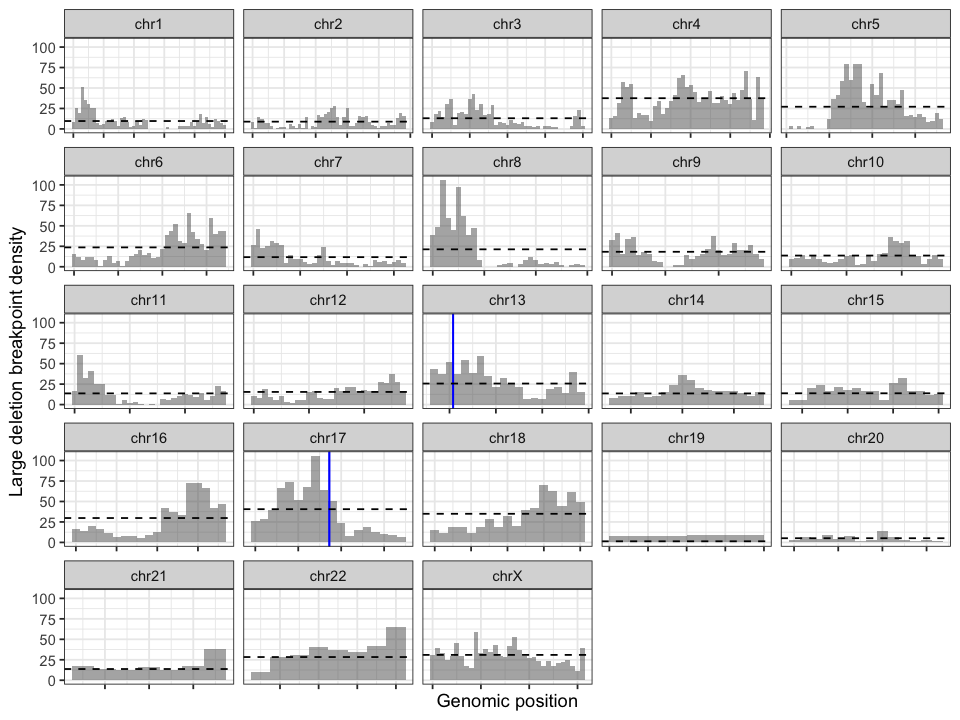

In [105]:
#Mean per chromosome

ordchrs<-c("chr1","chr2","chr3","chr4","chr5","chr6","chr7","chr8","chr9","chr10","chr11","chr12",
          "chr13","chr14","chr15","chr16","chr17","chr18","chr19","chr20","chr21","chr22","chrX")
long.all_del_hrd_samps$V1<-factor(long.all_del_hrd_samps$V1,levels=ordchrs)

chr_counts<-table(long.all_del_hrd_samps$V1)-1
chr_means<-(chr_counts/(chr_lengths[,2]))*5000000
chr_means

vline.data <- data.frame(V1 = c("chr13","chr13","chr17","chr17"),v2=c(32314862,32400266,43044295,43170245))
hline.data <- data.frame(V1 = levels(long.all_del_hrd_samps$V1),v2=as.numeric(chr_means))

#png("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_figures/Breakpoint_pileups_dels_HRDsamples.png",width=8,height=6,unit="in",res=300)
options(repr.plot.width=8,repr.plot.height=6)

ggplot(long.all_del_hrd_samps,aes(x=value))+
geom_histogram(binwidth=5000000,alpha=0.5)+
facet_wrap(~V1,scales="free_x")+
ylab("Large deletion breakpoint density")+xlab("Genomic position")+
 geom_vline(aes(xintercept = v2), vline.data,col="blue")+
geom_hline(aes(yintercept = v2), hline.data,col="black",lty="dashed")+
theme_bw()+
theme(axis.text.x = element_blank())


#To do add vertical lines and set x scales to lengths of chromosomes - just deletions? HRD samples?



#dev.off()